In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from pylab import rcParams
rcParams['figure.figsize']= 14,8
random_seed=42
LABELS=["Present","not present"] 

In [ ]:
df=pd.read_csv('/content/geelongbuiltenv with Geographic location (1).csv',sep=',')
df.head()

,LUM,LUMquintile,TrainDistThresh,BusDistThresh,BusPres,AccUtDestPres,AccUtDestPresquintile,AccUtDestDist,AccUtDestDistquintile,SprtLeiDens,SprtLeiDensquintile,SprtLeiDist,SprtLeiDistquintile,POSDist,POSDistquintile,POSAreaPct,POSAreaPctquintile,TakeawayDens,TakeawayDensquintile,TakeawayDist,TakeawayDistquintile,HealthyFoodDensity,HealthyFoodDensityquintile,HealthyFoodDist,HealthyFoodDistquintile,GrossDwlDens,GrossDwlDensquintile,StrtConn,StrtConnquintile,ActCenDist,ActCenDistquintile,TobPopDensp1000,TobPopDensp1000quintile,TobTobVendDist,TobTobVendDistquintile,RatioTrailsToRoads,RatioTrailsToRoadsquintile,Latitude,Longitude,TrainPres
0,0.418636,4,0,1,1,2,2,2,2,0.000000,1,2334.840293,3,195.308128,1,0.211762,4,0.088528,3,734.854534,2,0.000000,1,2681.513753,4,6.138845,4,41.378732,4,21768.170070,4,0.419933,2,775.371825,3,0.063443,2,-38.1567,144.5551,0
1,0.512726,4,1,1,1,7,5,7,5,0.000000,1,913.552249,1,250.556874,3,0.031718,1,0.485292,5,341.128302,1,0.178792,5,584.101684,1,13.940743,5,77.755440,5,1812.155338,1,2.996704,4,315.721995,1,0.025997,1,-38.1333,144.3500,0
2,0.209689,2,0,1,1,5,3,4,4,0.020258,3,1400.551320,2,324.854903,4,0.425467,5,0.162064,4,769.448651,3,0.050645,2,1366.097985,2,0.676011,3,7.134546,3,5267.718643,2,2.670940,4,746.243079,2,0.135687,3,-38.1700,144.3960,0
3,0.847546,5,1,1,1,7,5,7,5,0.037318,4,965.344308,1,229.975343,2,0.142600,4,0.621958,5,369.506218,1,0.024878,2,956.274668,2,7.481207,5,113.265985,5,1663.495404,1,9.479434,5,316.179185,1,0.172038,3,-38.1674,144.3658,1
4,0.307938,3,0,1,1,3,2,4,3,0.000000,1,1967.155970,3,295.410346,3,0.103317,4,0.056174,3,721.547118,2,0.028087,2,932.819631,2,9.638756,5,57.587787,5,4325.191244,1,0.329327,2,669.341899,2,0.157551,3,-38.1200,144.3200,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LUM                         46 non-null     float64
 1   LUMquintile                 46 non-null     int64  
 2   TrainDistThresh             46 non-null     int64  
 3   BusDistThresh               46 non-null     int64  
 4   BusPres                     46 non-null     int64  
 5   AccUtDestPres               46 non-null     int64  
 6   AccUtDestPresquintile       46 non-null     int64  
 7   AccUtDestDist               46 non-null     int64  
 8   AccUtDestDistquintile       46 non-null     int64  
 9   SprtLeiDens                 46 non-null     float64
 10  SprtLeiDensquintile         46 non-null     int64  
 11  SprtLeiDist                 46 non-null     float64
 12  SprtLeiDistquintile         46 non-null     int64  
 13  POSDist                     46 non-nu

In [ ]:
#creating dependent and independent attributes
columns=df.columns.tolist()
columns=[c for c in columns if c not in ['TrainPres']]
target='TrainPres'
state=np.random.RandomState(42)
x=df[columns]
y=df[target]
x_outliers=state.uniform(low=0,high=1,size=(x.shape[0],x.shape[1]))
print(x.shape)
print(y.shape)

(46, 39)
(46,)


In [ ]:
df.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

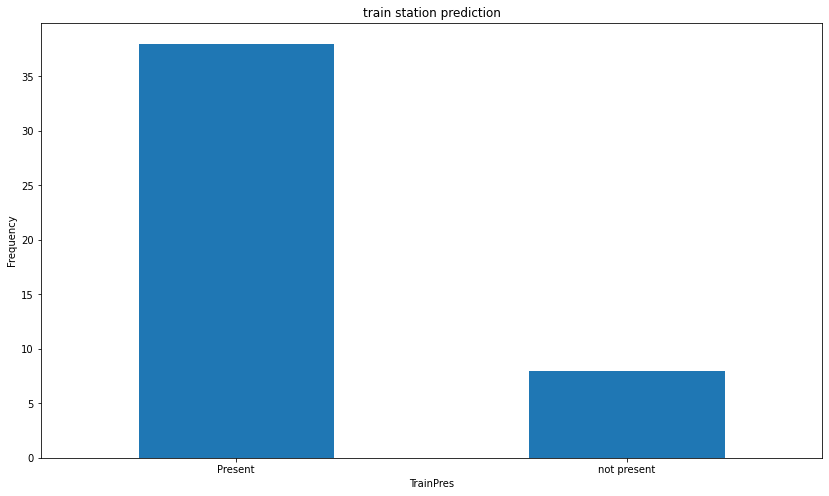

In [ ]:
count_TrainPres=pd.value_counts(df['TrainPres'],sort =True)
count_TrainPres.plot(kind='bar',rot=0)
plt.title('train station prediction')
plt.xticks(range(2),LABELS)
plt.xlabel('TrainPres')
plt.ylabel('Frequency')


In [ ]:
notpresent=df[df['TrainPres']==0]
present=df[df['TrainPres']==1]
print(notpresent.shape,present.shape)

(38, 40) (8, 40)


In [ ]:
from imblearn.combine import SMOTETomek


In [ ]:
##oversampling
smk=SMOTETomek(random_state=42)
x_res,y_res=smk.fit_sample(x,y)
x_res.shape,y_res.shape


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


((68, 39), (68,))

In [ ]:
from collections import Counter
print('orginal dataset shape{}'.format(Counter(y)))
print('resampled dataset shape{}'.format(Counter(y_res)))

orginal dataset shapeCounter({0: 38, 1: 8})
resampled dataset shapeCounter({0: 34, 1: 34})


In [ ]:
#Random oversampling
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(ratio=1)
x_train_res,y_train_res=os.fit_sample(x,y)
x_train_res.shape,y_train_res.shape

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


((76, 39), (76,))

In [ ]:
print('orginal dataset shape{}'.format(Counter(y)))
print('resampled dataset shape{}'.format(Counter(y_train_res)))

orginal dataset shapeCounter({0: 38, 1: 8})
resampled dataset shapeCounter({0: 38, 1: 38})


In [ ]:
#co-relation
x=df.drop('TrainPres' , axis=1)
y=df['TrainPres']

x.shape,y.shape

((46, 39), (46,))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [ ]:
#constant removal
constant_filter=VarianceThreshold(threshold=0)
constant_filter.fit(x_train)

VarianceThreshold(threshold=0)